<a href="https://colab.research.google.com/github/Dofften/FPL-Oort/blob/main/FPL_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jul 15 12:52:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Check for GPU
import torch
torch.cuda.is_available()

True

In [3]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# Count number of devices
torch.cuda.device_count()

1

In [5]:
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

In [6]:
import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
s2223 = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/gws/merged_gw.csv'
s2122 = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2021-22/gws/merged_gw.csv'
s2021 = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2020-21/gws/merged_gw.csv'
s1920 = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/merged_gw.csv'
# s1819 = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/merged_gw.csv'
# s1718 = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2017-18/gws/merged_gw.csv'
# s1617 = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2016-17/gws/merged_gw.csv'

In [9]:
s2223_df = pd.read_csv(s2223)
s2122_df = pd.read_csv(s2122)
s2021_df = pd.read_csv(s2021)
s1920_df = pd.read_csv(s1920)
#s1819_df = pd.read_csv(s1819)
#s1718_df = pd.read_csv(s1718)
#s1617_df = pd.read_csv(s1617)

In [10]:
df = pd.concat([s1920_df,s2021_df,s2122_df,s2223_df])

In [14]:
df.columns, s2223_df.columns

(Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
        'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
        'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
        'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
        'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
        'transfers_balance', 'transfers_in', 'transfers_out', 'value',
        'was_home', 'yellow_cards', 'GW', 'position', 'team', 'xP',
        'expected_assists', 'expected_goal_involvements', 'expected_goals',
        'expected_goals_conceded', 'starts'],
       dtype='object'),
 Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
        'clean_sheets', 'creativity', 'element', 'expected_assists',
        'expected_goal_involvements', 'expected_goals',
        'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
        'ict_index', 'influence', 'kickoff_time', 'minute

In [17]:
df

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,position,team,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,starts
0,Aaron_Cresswell_376,0,0,7,0,1.5,376,8,5,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron_Lennon_430,0,0,3,0,0.0,430,3,0,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron_Mooy_516,0,0,0,0,0.0,516,7,0,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aaron_Ramsdale_494,0,0,11,0,0.0,494,2,1,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aaron_Wan-Bissaka_122,0,2,34,1,16.1,122,9,0,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26500,Oliver Skipp,0,0,16,0,0.0,441,377,1,0,...,0,38,MID,Spurs,2.0,0.01,0.01,0.0,1.5,1.0
26501,Ryan Sessegnon,0,0,0,0,0.0,436,377,0,0,...,0,38,DEF,Spurs,0.0,0.00,0.00,0.0,0.0,0.0
26502,Ashley Young,0,0,0,0,0.0,538,372,0,0,...,0,38,DEF,Aston Villa,1.0,0.00,0.00,0.0,0.0,0.0
26503,Jeremy Sarmiento Morante,0,0,0,0,0.0,119,372,0,0,...,0,38,MID,Brighton,0.0,0.00,0.00,0.0,0.0,0.0


In [13]:
df['position'].isnull().values.any()

True

In [ ]:
#Create a new column to represent the following week's points
# Assuming your data is in a dataframe called df
df['next_points'] = df.groupby('name')['total_points'].shift(-1) # Shift the points column by -1 within each name group
df['next_points'].fillna(0, inplace=True) # Replace any NaN values with 0

In [ ]:
gk_df = df[df['position']=='GK']
def_df = df[df['position']=='DEF']
mid_df = df[df['position']=='MID']
fwd_df = df[df['position']=='FWD']

In [ ]:
gk_df

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,next_points
10,Brandon Austin,GK,Spurs,1.5,0,0,0,0,0.0,451,...,0.0,0,0,0,0,40,True,0,1,0.0
14,Alisson Ramses Becker,GK,Liverpool,5.5,0,0,11,0,0.0,281,...,0.0,1,0,0,0,55,False,0,1,2.0
20,Jason Steele,GK,Brighton,0.5,0,0,0,0,0.0,102,...,0.0,0,0,0,0,40,False,0,1,0.0
24,Marek Rodák,GK,Fulham,0.7,0,0,11,0,0.0,213,...,0.0,1,0,0,0,45,True,0,1,6.0
27,Karl Darlow,GK,Newcastle,1.5,0,0,0,0,0.0,353,...,0.0,0,0,0,0,40,True,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26471,Kristoffer Klaesson,GK,Leeds,0.0,0,0,0,0,0.0,236,...,0.0,0,161,1915,1754,38,True,0,38,0.0
26485,Filip Marschall,GK,Aston Villa,0.0,0,0,0,0,0.0,670,...,0.0,0,-5,0,5,40,True,0,38,0.0
26494,Vicente Guaita,GK,Crystal Palace,0.0,0,0,0,0,0.0,152,...,0.0,0,1595,4895,3300,44,True,0,38,0.0
26498,Hugo Lloris,GK,Spurs,0.0,0,0,0,0,0.0,425,...,0.0,0,-1536,219,1755,54,False,0,38,0.0


In [ ]:
gk_df[gk_df['name']=='Nick Pope']

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,next_points
567,Nick Pope,GK,Newcastle,3.6,0,0,21,1,0.0,376,...,0.0,6,0,0,0,50,True,0,1,10.0
1148,Nick Pope,GK,Newcastle,8.0,0,3,31,1,0.0,376,...,0.0,10,13550,32436,18886,50,False,0,2,3.0
1740,Nick Pope,GK,Newcastle,5.3,0,0,23,0,0.0,376,...,0.0,3,27862,67945,40083,50,True,0,3,3.0
2341,Nick Pope,GK,Newcastle,5.5,0,0,16,0,0.0,376,...,0.0,3,109553,143612,34059,50,False,0,4,2.0
2949,Nick Pope,GK,Newcastle,3.8,0,0,21,0,0.0,376,...,0.0,2,-24950,33601,58551,50,False,0,5,12.0
3573,Nick Pope,GK,Newcastle,6.0,0,3,40,1,0.0,376,...,0.0,12,102997,139805,36808,50,True,0,6,2.0
4014,Nick Pope,GK,Newcastle,5.3,0,0,12,0,0.0,376,...,0.0,2,624232,644512,20280,52,True,0,8,2.0
4651,Nick Pope,GK,Newcastle,2.0,0,0,9,0,0.0,376,...,0.0,2,185828,279209,93381,53,False,0,9,2.0
5292,Nick Pope,GK,Newcastle,2.0,0,0,13,0,0.0,376,...,0.0,2,134913,200447,65534,53,True,0,10,6.0
5935,Nick Pope,GK,Newcastle,3.0,0,0,24,1,0.0,376,...,0.0,6,-13620,92196,105816,53,False,0,11,6.0


In [ ]:
gk_df

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,next_points
10,Brandon Austin,GK,Spurs,1.5,0,0,0,0,0.0,451,...,0.0,0,0,0,0,40,True,0,1,0.0
14,Alisson Ramses Becker,GK,Liverpool,5.5,0,0,11,0,0.0,281,...,0.0,1,0,0,0,55,False,0,1,2.0
20,Jason Steele,GK,Brighton,0.5,0,0,0,0,0.0,102,...,0.0,0,0,0,0,40,False,0,1,0.0
24,Marek Rodák,GK,Fulham,0.7,0,0,11,0,0.0,213,...,0.0,1,0,0,0,45,True,0,1,6.0
27,Karl Darlow,GK,Newcastle,1.5,0,0,0,0,0.0,353,...,0.0,0,0,0,0,40,True,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26471,Kristoffer Klaesson,GK,Leeds,0.0,0,0,0,0,0.0,236,...,0.0,0,161,1915,1754,38,True,0,38,0.0
26485,Filip Marschall,GK,Aston Villa,0.0,0,0,0,0,0.0,670,...,0.0,0,-5,0,5,40,True,0,38,0.0
26494,Vicente Guaita,GK,Crystal Palace,0.0,0,0,0,0,0.0,152,...,0.0,0,1595,4895,3300,44,True,0,38,0.0
26498,Hugo Lloris,GK,Spurs,0.0,0,0,0,0,0.0,425,...,0.0,0,-1536,219,1755,54,False,0,38,0.0


In [ ]:
def_df[def_df['name']=='John Stones']

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,next_points
183,John Stones,DEF,Man City,3.6,0,0,0,0,0.0,302,...,0.0,0,0,0,0,55,False,0,1,1.0
759,John Stones,DEF,Man City,2.0,0,0,3,0,0.3,302,...,0.0,1,-35318,5273,40591,55,True,0,2,0.0
1343,John Stones,DEF,Man City,1.3,0,0,10,0,1.9,302,...,0.0,0,-31282,3385,34667,54,False,1,3,3.0
1938,John Stones,DEF,Man City,2.0,1,1,26,0,16.1,302,...,4.0,3,-14029,8197,22226,54,True,0,4,10.0
2540,John Stones,DEF,Man City,4.3,1,1,40,1,12.2,302,...,2.0,10,-1670,12532,14202,54,True,0,5,2.0
3150,John Stones,DEF,Man City,4.2,0,0,16,0,1.1,302,...,2.0,2,11522,25293,13771,54,False,0,6,6.0
3711,John Stones,DEF,Man City,6.2,0,0,22,1,2.8,302,...,17.0,6,12440,21932,9492,54,False,0,8,0.0
4217,John Stones,DEF,Man City,0.0,0,0,0,0,0.0,302,...,0.0,0,-21965,9787,31752,54,True,0,9,0.0
4857,John Stones,DEF,Man City,0.0,0,0,0,0,0.0,302,...,0.0,0,-35804,227,36031,54,True,0,10,0.0
5499,John Stones,DEF,Man City,0.0,0,0,0,0,0.0,302,...,0.0,0,-13390,167,13557,54,False,0,11,0.0


In [ ]:
gk_corr_matrix = gk_df.corr(method='spearman')
def_corr_matrix = def_df.corr(method='spearman')
mid_corr_matrix = mid_df.corr(method='spearman')
fwd_corr_matrix = fwd_df.corr(method='spearman')

<ipython-input-12-ea85ec1583d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gk_corr_matrix = gk_df.corr(method='spearman')
<ipython-input-12-ea85ec1583d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  def_corr_matrix = def_df.corr(method='spearman')
<ipython-input-12-ea85ec1583d2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mid_corr_matrix = mid_df.corr(method='spearman')
<ipython-input-12-ea85ec1583d2>:4: FutureWarning: The default value of numeric_only in DataFr

In [ ]:
gk_corr_matrix['next_points'].sort_values(ascending=False)

next_points                   1.000000
minutes                       0.843495
influence                     0.832049
ict_index                     0.831340
bps                           0.825098
total_points                  0.789666
saves                         0.772554
goals_conceded                0.673047
xP                            0.618966
transfers_in                  0.596572
starts                        0.593580
expected_goals_conceded       0.587381
selected                      0.577562
value                         0.560773
transfers_out                 0.555828
clean_sheets                  0.388419
expected_assists              0.348438
expected_goal_involvements    0.342655
bonus                         0.287758
yellow_cards                  0.169274
creativity                    0.142308
penalties_saved               0.105367
assists                       0.074749
own_goals                     0.059055
transfers_balance             0.048818
threat                   

In [ ]:
def_corr_matrix['next_points'].sort_values(ascending=False)

next_points                   1.000000
minutes                       0.595479
influence                     0.592078
ict_index                     0.591606
bps                           0.579255
creativity                    0.573150
total_points                  0.518297
xP                            0.486620
transfers_in                  0.480994
threat                        0.434260
goals_conceded                0.426494
expected_goals_conceded       0.399327
starts                        0.399138
transfers_out                 0.383641
selected                      0.381173
expected_assists              0.366371
expected_goal_involvements    0.362204
value                         0.344892
clean_sheets                  0.277116
expected_goals                0.242477
bonus                         0.198850
yellow_cards                  0.174348
assists                       0.121632
transfers_balance             0.113081
goals_scored                  0.094238
own_goals                

In [ ]:
mid_corr_matrix['next_points'].sort_values(ascending=False)

next_points                   1.000000
minutes                       0.729829
ict_index                     0.725308
creativity                    0.721167
total_points                  0.705243
influence                     0.698727
bps                           0.659706
xP                            0.625050
threat                        0.621826
transfers_in                  0.597013
selected                      0.524792
transfers_out                 0.524054
goals_conceded                0.493290
expected_goals_conceded       0.465710
expected_assists              0.456649
expected_goal_involvements    0.443613
starts                        0.442622
value                         0.431824
expected_goals                0.383073
clean_sheets                  0.320517
assists                       0.226609
goals_scored                  0.225807
bonus                         0.208867
yellow_cards                  0.195644
penalties_missed              0.045896
own_goals                

In [ ]:
fwd_corr_matrix['next_points'].sort_values(ascending=False)

next_points                   1.000000
minutes                       0.688258
ict_index                     0.665995
total_points                  0.659749
creativity                    0.657075
threat                        0.633929
influence                     0.620772
xP                            0.614772
transfers_in                  0.589800
bps                           0.498569
transfers_out                 0.493001
selected                      0.488998
value                         0.478119
expected_goals_conceded       0.439942
goals_conceded                0.431899
expected_assists              0.420822
expected_goal_involvements    0.415682
starts                        0.413153
expected_goals                0.406104
goals_scored                  0.307809
clean_sheets                  0.284600
bonus                         0.282126
assists                       0.179560
yellow_cards                  0.163204
penalties_missed              0.069751
transfers_balance        

In [ ]:
gk_df.drop(gk_df.loc[gk_df['minutes']==0].index, inplace=True)

NameError: ignored

In [ ]:
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split

gam = LinearGAM(s(0) + s(1) + f(2))

In [ ]:
gk_ml_X = gk_df[['minutes','influence','ict_index','bps','total_points','saves','goals_conceded','xP']].copy()
def_ml_X = gk_df[['minutes','influence','ict_index','bps','creativity','total_points','xP','transfers_in']].copy()
mid_ml_X = gk_df[['minutes','ict_index','creativity','total_points','influence','bps','xP','threat', 'transfers_in']].copy()
fwd_ml_X = gk_df[['minutes','ict_index','total_points','creativity','threat','influence','xP','transfers_in']].copy()
gk_ml_y = gk_df[['next_points']].copy()
def_ml_y = def_df[['next_points']].copy()
mid_ml_y = mid_df[['next_points']].copy()
fwd_ml_y = fwd_df[['next_points']].copy()

In [ ]:
# gk_ml_X.drop(gk_ml_X.loc[gk_ml_X['minutes']==0].index, inplace=True)
# gk_ml_y.drop(gk_ml_y.loc[gk_ml_y['minutes']==0].index, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 10 to 26499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   minutes         2791 non-null   int64  
 1   influence       2791 non-null   float64
 2   ict_index       2791 non-null   float64
 3   bps             2791 non-null   int64  
 4   total_points    2791 non-null   int64  
 5   saves           2791 non-null   int64  
 6   goals_conceded  2791 non-null   int64  
 7   xP              2791 non-null   float64
 8   next_points     2791 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 218.0 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(gk_ml_X, gk_ml_y, test_size=0.2, random_state=42)

In [ ]:
X_train

,minutes,influence,ict_index,bps,total_points,saves,goals_conceded,xP
1740,90,45.8,4.6,23,3,7,3,5.3
21048,90,19.2,1.9,12,1,2,3,0.2
20628,90,19.0,1.9,18,2,4,3,2.7
23393,90,24.4,2.4,16,3,4,1,3.7
26188,90,0.0,0.0,15,3,3,1,1.5
...,...,...,...,...,...,...,...,...
1990,90,46.8,4.7,22,3,6,2,0.2
3123,90,51.0,5.1,23,2,7,5,1.4
8270,90,20.8,2.1,22,2,5,2,3.2
13935,90,19.8,2.0,15,1,2,3,3.6


In [ ]:
y_train

,next_points
1740,3.0
21048,0.0
20628,6.0
23393,7.0
26188,0.0
...,...
1990,2.0
3123,0.0
8270,9.0
13935,2.0


In [ ]:
gam = LinearGAM(s(0) + s(1) + f(2)).fit(X_train, y_train)

In [ ]:
gam.lam

[[0.6], [0.6], [0.6]]

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     56.1281
Link Function:                     IdentityLink Log Likelihood:                                 -1961.2964
Number of Samples:                          616 AIC:                                              4036.849
                                                AICc:                                            4048.7541
                                                GCV:                                                10.944
                                                Scale:                                              9.1651
                                                Pseudo R-Squared:                                   0.1315
Feature Function                  Lam

<ipython-input-56-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [ ]:
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam.gridsearch(gk_ml_X, gk_ml_y, lam=lams)
gam.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:31 Time:  0:00:31


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     53.5664
Link Function:                     IdentityLink Log Likelihood:                                 -4607.2181
Number of Samples:                         2232 AIC:                                              9323.569
                                                AICc:                                            9326.3553
                                                GCV:                                                2.7239
                                                Scale:                                              2.6065
                                                Pseudo R-Squared:                                   0.4867
Feature Function                  Lam

<ipython-input-45-012631932d30>:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [ ]:
import matplotlib.pyplot as plt

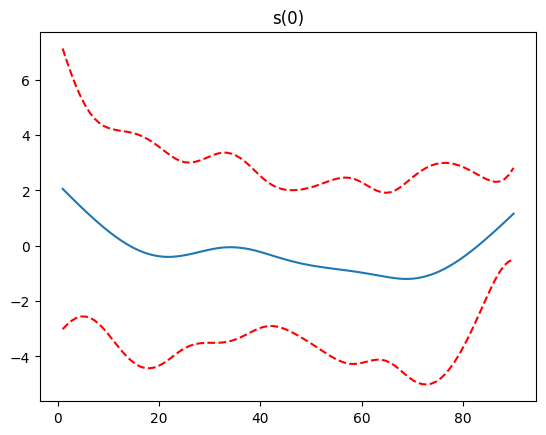

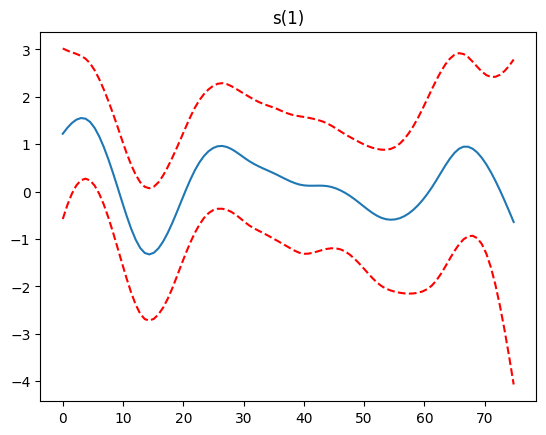

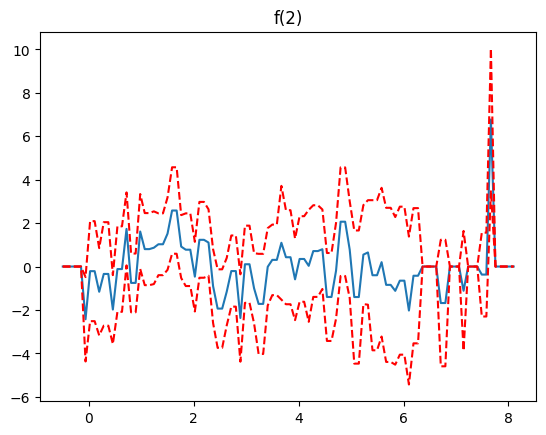

In [ ]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

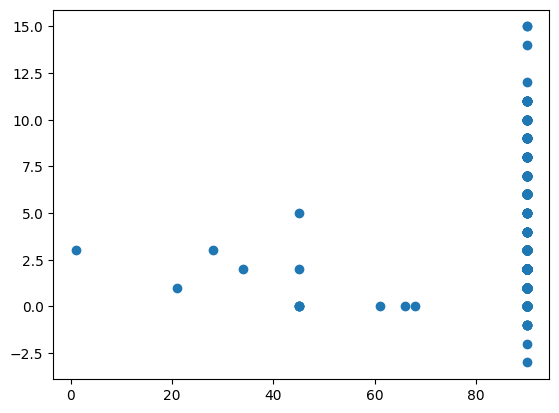

In [ ]:
plt.scatter(X_train['minutes'], y_train)
plt.show()

ValueError: ignored

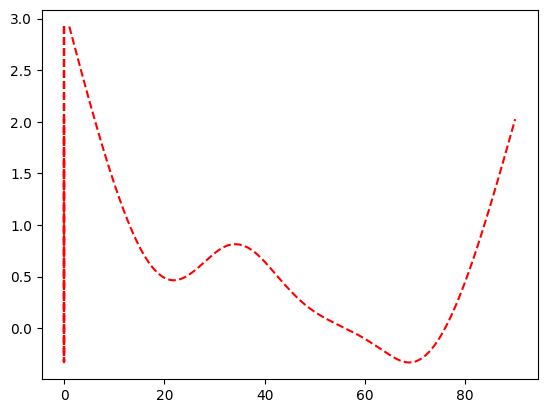

In [ ]:
XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');

In [ ]:
gk_df[gk_df['minutes']==1]

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,next_points
25256,Wayne Hennessey,GK,Nott'm Forest,-0.3,0,0,3,0,0.0,518,...,0.0,1,-1087,351,1438,39,True,0,37,3.0


In [22]:
!pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [41]:
from git import Repo
repo = Repo.clone_from("https://github.com/vaastav/Fantasy-Premier-League.git", "Fantasy1")

In [34]:
commits = repo.iter_commits("--all", paths="data/2022-23/players_raw.csv")

In [35]:
count = 0
lst=[]
for commit in commits:
    print(f"{count}. Committed by {commit.committer.name}, with sha {commit.hexsha}")
    lst.append(commit.hexsha)
    count += 1

0. Committed by Vaastav Anand, with sha 7009d351b6077cc3f3ae5bdc3a7e23f58f6817e6
1. Committed by Vaastav Anand, with sha e34b0a593b78873e22891784b641f25c9ee12501
2. Committed by Vaastav Anand, with sha 2e8ddfdb7ef963e16992f747eac31d374bf30e36
3. Committed by Vaastav Anand, with sha df7134ef9c05339cf2fc98e20ef9ad48796888b6
4. Committed by Vaastav Anand, with sha 9f3c8b124eec9a64ed2466092430c65dcc747659
5. Committed by Vaastav Anand, with sha ef6ff5b77e25fd0a5e7bae400b9e649fa0304954
6. Committed by Vaastav Anand, with sha 831eda88132385f23b6fb5cdc3ef281ba394fbbb
7. Committed by Vaastav Anand, with sha 89bbf41521ea689f7e4544cafdb5537d931a643f
8. Committed by Vaastav Anand, with sha 9900f03ec09be9f8f647911889d72e3bd90de21a
9. Committed by Vaastav Anand, with sha be279f791fd0bfbcbeddf2006cab5b60fd69067f
10. Committed by Vaastav Anand, with sha a5735bcf43e5da558936e4467126d01bb9123272
11. Committed by Vaastav Anand, with sha a5b40704eea0be9b3148e267c64ec547413f0c87
12. Committed by Vaastav A

In [36]:
len(lst)

39

In [37]:
lst

['7009d351b6077cc3f3ae5bdc3a7e23f58f6817e6',
 'e34b0a593b78873e22891784b641f25c9ee12501',
 '2e8ddfdb7ef963e16992f747eac31d374bf30e36',
 'df7134ef9c05339cf2fc98e20ef9ad48796888b6',
 '9f3c8b124eec9a64ed2466092430c65dcc747659',
 'ef6ff5b77e25fd0a5e7bae400b9e649fa0304954',
 '831eda88132385f23b6fb5cdc3ef281ba394fbbb',
 '89bbf41521ea689f7e4544cafdb5537d931a643f',
 '9900f03ec09be9f8f647911889d72e3bd90de21a',
 'be279f791fd0bfbcbeddf2006cab5b60fd69067f',
 'a5735bcf43e5da558936e4467126d01bb9123272',
 'a5b40704eea0be9b3148e267c64ec547413f0c87',
 '359e5f05bd3ea8a2684b0e9d7fe5e20335510fd4',
 '4216d334f6d9cc4950910b2e7f3c1e8b0fb4d97d',
 '611f2f64be2d3d3907350066893f263221b98a9e',
 '4e199d6bb3ace61fd390a9d63e6a5f81d96094c7',
 '6179a68da099454cd16981b0454a869243dd1095',
 'b7b12bec63d9d0a99f6c1d292107c826fe68934d',
 'b2543a40b7df4692ea61dd0169b07c07c77a5bda',
 'da266ffa5eacf9f3f9d70aedc2a2ee85c7309d46',
 '6809bd41a7cf3054841731b326a6561fb9416d85',
 '92f81c3063ae2ae361daecc81fa51f909dd109a9',
 'c523018c

In [38]:
import os

# A counter variable
counter = 0

# Loop over the list
for x in lst:
  # Get the raw URL of the file by inserting the hexsha
  url = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/{x}/data/2022-23/players_raw.csv"

  # Send a GET request and get the content
  r = requests.get(url)
  content = r.content

  # Get the current working directory
  directory = os.getcwd()

  # Get the file name by inserting the counter
  filename = f"{directory}/2022-23/gw{counter}.csv"

  # Open a file in write mode and write the content
  with open(filename, "wb") as f:
    f.write(content)

  # Increment the counter
  counter += 1


In [42]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount("/content/drive")

# Copy the folder to Google Drive
shutil.copytree("2022-23", "/content/drive/MyDrive/FPL_history/2223")


Mounted at /content/drive


'/content/drive/MyDrive/FPL_history/2223'

In [43]:
commits_2122 = repo.iter_commits("--all", paths="data/2021-22/players_raw.csv")

In [44]:
count = 0
lst_2122=[]
for commit in commits_2122:
    print(f"{count}. Committed by {commit.committer.name}, with sha {commit.hexsha}")
    lst_2122.append(commit.hexsha)
    count += 1

0. Committed by Vaastav Anand, with sha 969ebcc35cf19520b6c6318bf833a54074b7dfab
1. Committed by Vaastav Anand, with sha d757bb247fb2192cd4d9cce9bb245a7636ac94c9
2. Committed by Vaastav Anand, with sha 9cdc5af958c6cf98e118eabfd734bedb65117da3
3. Committed by Vaastav Anand, with sha 76927d6216f0ee6f0e987e9baac987e74b54f414
4. Committed by Vaastav Anand, with sha a3571fe862ad3547a464cd6afe6c5b76a6ae2936
5. Committed by Vaastav Anand, with sha 1249870d0d959e0a06c4b1cf3c071de1c059bce5
6. Committed by Vaastav Anand, with sha f01f8e2dd3c9a85dabca0f9967dea742cdb3009d
7. Committed by Vaastav Anand, with sha ddf97caea4220a48959cb3b6628f6d89146e5f95
8. Committed by Vaastav Anand, with sha 70b05e22e793f465be624f7da271d843a785cf3d
9. Committed by Vaastav Anand, with sha 621c7ce7c9741a07d32719320e7a28595272264c
10. Committed by Vaastav Anand, with sha 145a6102b3c6c8f5625be1290958c8ed71d081de
11. Committed by Vaastav Anand, with sha bc88e81f8c636df46f82f0ece0c030c8363b1ecf
12. Committed by Vaastav A

In [45]:
lst_2122

['969ebcc35cf19520b6c6318bf833a54074b7dfab',
 'd757bb247fb2192cd4d9cce9bb245a7636ac94c9',
 '9cdc5af958c6cf98e118eabfd734bedb65117da3',
 '76927d6216f0ee6f0e987e9baac987e74b54f414',
 'a3571fe862ad3547a464cd6afe6c5b76a6ae2936',
 '1249870d0d959e0a06c4b1cf3c071de1c059bce5',
 'f01f8e2dd3c9a85dabca0f9967dea742cdb3009d',
 'ddf97caea4220a48959cb3b6628f6d89146e5f95',
 '70b05e22e793f465be624f7da271d843a785cf3d',
 '621c7ce7c9741a07d32719320e7a28595272264c',
 '145a6102b3c6c8f5625be1290958c8ed71d081de',
 'bc88e81f8c636df46f82f0ece0c030c8363b1ecf',
 'bae46a12ebbbd8cc4dcdd21a0c44a7fd4ff903ab',
 'd9c1a3a83f52ef2a9f940d6c28780569acaeaf6f',
 '794c4c3b5bdd0bd97daa44460b0233ea0abd8dc0',
 '1670ecdb80f3634cfcd9f20e9d0fe97406bed59c',
 '4ded623df8579f8f65adf11d1155bcc194bb582d',
 '487bc69c3ae2834f2a567ae34193dc6b2ca529c7',
 'c507d88c3e5fc32d374df5d3326a747a10c0fae4',
 '3d874d98830ff89bee4e1e9efb98384956b1afea',
 '1a1e19be8244ea58a8ce15e8de46c5fd4f4c24ce',
 'd6698249f9c62cb1756f06c411d6dff4d8291b7d',
 '22deb274

In [46]:
# A counter variable
counter = 0

# Loop over the list
for x in lst_2122:
  # Get the raw URL of the file by inserting the hexsha
  url = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/{x}/data/2021-22/players_raw.csv"

  # Send a GET request and get the content
  r = requests.get(url)
  content = r.content

  # Get the current working directory
  directory = os.getcwd()

  # Get the file name by inserting the counter
  filename = f"{directory}/2021-22/gw{counter}.csv"

  # Open a file in write mode and write the content
  with open(filename, "wb") as f:
    f.write(content)

  # Increment the counter
  counter += 1

In [47]:
shutil.copytree("2021-22", "/content/drive/MyDrive/FPL_history/2122")

'/content/drive/MyDrive/FPL_history/2122'

In [49]:
commits_2021 = repo.iter_commits("--all", paths="data/2020-21/players_raw.csv")
count = 0
lst_2021=[]
for commit in commits_2021:
    print(f"{count}. Committed by {commit.committer.name}, with sha {commit.hexsha}")
    lst_2021.append(commit.hexsha)
    count += 1

lst_2021

# A counter variable
counter = 0

# Loop over the list
for x in lst_2021:
  # Get the raw URL of the file by inserting the hexsha
  url = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/{x}/data/2020-21/players_raw.csv"

  # Send a GET request and get the content
  r = requests.get(url)
  content = r.content

  # Get the current working directory
  directory = os.getcwd()

  # Get the file name by inserting the counter
  filename = f"{directory}/2020-21/gw{counter}.csv"

  # Open a file in write mode and write the content
  with open(filename, "wb") as f:
    f.write(content)

  # Increment the counter
  counter += 1

shutil.copytree("2020-21", "/content/drive/MyDrive/FPL_history/2021")

0. Committed by Vaastav Anand, with sha 261b3f5dbbbc34e6cce8f8d15998ca8fcba2a078
1. Committed by Vaastav Anand, with sha 2e6c87be387b2a1900f1e93cbbc1fb91be2d6ea9
2. Committed by Vaastav Anand, with sha d3243ed8987a6cd85781dc6ef3c5f4ebef8ae61b
3. Committed by Vaastav Anand, with sha c1282764b1b0b174468f056793797e2a9095d677
4. Committed by Vaastav Anand, with sha e5c187666fd3a0d073872e32f87fc44b19ae2031
5. Committed by Vaastav Anand, with sha d09d35ad1b9ad59ba4109de2c9756f0a4ffde4ad
6. Committed by Vaastav Anand, with sha 9105156cfa57ade66b3550358201febb98ef622d
7. Committed by Vaastav Anand, with sha b8f7f9e42638a5b3a9333aa18755e2c796209a6b
8. Committed by Vaastav Anand, with sha 0ebab032aca76358fcc6baa4b8e5bc7905ec1473
9. Committed by Vaastav Anand, with sha e894b25094ac4c9e214933d424e74400c5514df5
10. Committed by Vaastav Anand, with sha 6a74ef536e1425387f748e4c3bce4873ea9b11f4
11. Committed by Vaastav Anand, with sha 6716085d571db862369208ec3d7e5d6819de06bc
12. Committed by Vaastav A

'/content/drive/MyDrive/FPL_history/2021'

In [50]:
commits_1920 = repo.iter_commits("--all", paths="data/2019-20/players_raw.csv")
count = 0
lst_1920=[]
for commit in commits_1920:
    print(f"{count}. Committed by {commit.committer.name}, with sha {commit.hexsha}")
    lst_1920.append(commit.hexsha)
    count += 1

lst_1920

# A counter variable
counter = 0

# Loop over the list
for x in lst_1920:
  # Get the raw URL of the file by inserting the hexsha
  url = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/{x}/data/2019-20/players_raw.csv"

  # Send a GET request and get the content
  r = requests.get(url)
  content = r.content

  # Get the current working directory
  directory = os.getcwd()

  # Get the file name by inserting the counter
  filename = f"{directory}/2019-20/gw{counter}.csv"

  # Open a file in write mode and write the content
  with open(filename, "wb") as f:
    f.write(content)

  # Increment the counter
  counter += 1

shutil.copytree("2019-20", "/content/drive/MyDrive/FPL_history/1920")

0. Committed by vaastav, with sha f257ed51ce7c5169b4f682002a42dabf0682d4af
1. Committed by vaastav, with sha 712041b659b8113171915a7f9ea705c124772559
2. Committed by vaastav, with sha 97e7fbdc8613437146bf9bd902893183e2dc58ac
3. Committed by vaastav, with sha 3d889873f891b794d02825052ef9c6a9c3a6e460
4. Committed by vaastav, with sha 0aed687aa7e652536d0cec37889588d8e5eefd3c
5. Committed by vaastav, with sha 4e4abe7739ff65e29350e44721cdd00a946741ac
6. Committed by vaastav, with sha 5d7201b7e3a5c08fbd1608cb283409ec7041e41e
7. Committed by vaastav, with sha 9a723ae41d3fb62ca06aa9c6052812e69263c52d
8. Committed by vaastav, with sha fbc49b3e4338034a9922696cf8dbb9cf85c786d6
9. Committed by vaastav, with sha 2d3a2942ef261cf28618bb4c1df62236b8d2414c
10. Committed by vaastav, with sha 156eb7ff16d67026aabe68e94bdc206cbf867ff1
11. Committed by vaastav, with sha c0a4beb034e6cc15d88b8433de651fb5452d7c19
12. Committed by vaastav, with sha a72783d86ea2a07d88fcbceb2f9d0a4fea7ad93e
13. Committed by vaast

'/content/drive/MyDrive/FPL_history/1920'

In [51]:
commits_1819 = repo.iter_commits("--all", paths="data/2018-19/players_raw.csv")
count = 0
lst_1819=[]
for commit in commits_1819:
    print(f"{count}. Committed by {commit.committer.name}, with sha {commit.hexsha}")
    lst_1819.append(commit.hexsha)
    count += 1

lst_1819

# A counter variable
counter = 0

# Loop over the list
for x in lst_1819:
  # Get the raw URL of the file by inserting the hexsha
  url = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/{x}/data/2018-19/players_raw.csv"

  # Send a GET request and get the content
  r = requests.get(url)
  content = r.content

  # Get the current working directory
  directory = os.getcwd()

  # Get the file name by inserting the counter
  filename = f"{directory}/2018-19/gw{counter}.csv"

  # Open a file in write mode and write the content
  with open(filename, "wb") as f:
    f.write(content)

  # Increment the counter
  counter += 1

shutil.copytree("2018-19", "/content/drive/MyDrive/FPL_history/1819")

0. Committed by vaastav, with sha 32d43fcd1dab226a427bb45a8bc64b467b5d4412
1. Committed by vaastav, with sha feae56df41885467d3cabe954a6b738cb37a50d6
2. Committed by vaastav, with sha f0ccb1db3e00351486cee02dd62837b4d6cccaae
3. Committed by vaastav, with sha 29dfbbf19f26c09a9073f2fc75d9e46cae8e538c
4. Committed by vaastav, with sha 8a161a19910812cdd977498d94b93f8c24d82153
5. Committed by vaastav, with sha a0c5a0bbb92dc8c8a669ea0e3138a1016a008eb7
6. Committed by vaastav, with sha c4136872a46b0e93b231dbd45de117ecb22e69a9
7. Committed by vaastav, with sha 4f65d09e6ec2ba2c62a7f3f5048179fd77364dd0
8. Committed by vaastav, with sha ab719ddfa5c9921fc38cbe6592dd22eaf31b82b5
9. Committed by vaastav, with sha a88c7e84fa44d393a9e190cc4d92ec6c819b47ea
10. Committed by vaastav, with sha b603745892a1f8596f1c0d8c44a1f89fe769cd1f
11. Committed by vaastav, with sha 32542bbb7eadd11b7bbece89bcb55f68929a46ab
12. Committed by vaastav, with sha a2783cdf83231f8738a27c7d068d30f758506fc1
13. Committed by vaast

'/content/drive/MyDrive/FPL_history/1819'